In [ ]:
# Copyright (c) 2019 Skymind AI Bhd.
# Copyright (c) 2020 CertifAI Sdn. Bhd.
#
# This program and the accompanying materials are made available under the
# terms of the Apache License, Version 2.0 which is available at
# https://www.apache.org/licenses/LICENSE-2.0.
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS, WITHOUT
# WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the
# License for the specific language governing permissions and limitations
# under the License.
#
# SPDX-License-Identifier: Apache-2.0

# Use K Means to compress color spaces of images

One common example of K Means Clustering is to compress the colour spaces of images. An image usually comes with a 24-bit colour depth, meaning 2^24 = 16,777,216 colour variations.

K Means can be used to organize the colour variations into the their respective colour clusters. The "K" (number of cluster) here will be the the number of colour space. If K is set to 8, the available colour space is 8. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.cluster import KMeans 

%matplotlib inline

Read your image by using skimage and load it into a numpy array.

In [2]:
url = "https://ia801402.us.archive.org/2/items/ml-fundamentals-data/machine-learning-fundamentals-data/cat.jpg"
image = io.imread(url)

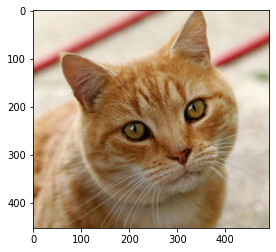

In [3]:
plt.imshow(image)

Show the dimension of the input picture, (Height, Width, Depth)

In [4]:
image.shape

(453, 492, 3)

Every colour channel has 256 possible values, the number of possible colours is 256 * 256 * 256 = 16,777,216, approx 16 million colours. Let us reduce the color space from 16 million to 8 colours.

In [5]:
image_scaled = image / 255.0 # use 0...1 scale
image_scaled = image_scaled.reshape((-1, 3))
image_scaled.shape


(222876, 3)

Train K means model to reduce the color space into 8 clusters

In [7]:
# TODO: Train a K-means Model
num_clusters = 8
model = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

In [8]:
# TODO: Fit data to the model
model.fit(image_scaled.astype(np.float32))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Get the: 
- cluster_centers_ : Coordinates of cluster centers.
- labels_ : Labels of each point
- inertia_ : Sum of squared distance from each point to their corresponding center

In [9]:
# TODO: Assign variables to its respective data
centroids = model.cluster_centers_
labels = model.labels_
inertia = model.inertia_

The generated clusters corresponds to the 8 colors of our reduced color palette.

Visual inspection of the centroids array shows that all colours have three channels (B, G, R) with values ranging between 0 and 1.

In [10]:
centroids

array([[0.912877  , 0.87591773, 0.81130785],
       [0.5837983 , 0.37637815, 0.21090293],
       [0.75277674, 0.6292579 , 0.50337833],
       [0.19520491, 0.09501466, 0.03202954],
       [0.6560449 , 0.51035684, 0.36030555],
       [0.83346725, 0.7529285 , 0.67066914],
       [0.44065273, 0.27950752, 0.13202354],
       [0.5056864 , 0.41418964, 0.30839172]], dtype=float32)

The labels will equal to the number of clusters that we have set.

In [11]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

These 8 colours correspond to the 8 cluster labels contained in the labels vector.

We want all our data points with label 0 to be colored according to row 0 in the centers array whereas all data points with label 1 to be colored according to row 1 in the centers array and same for other labels.

We use labels as an index into the centroids array which is also represents our new colours.

In [12]:
new_colours = centroids[labels].reshape((-1, 3))

In [13]:
image_compressed = new_colours.reshape(image.shape)

Text(0.5, 1.0, '8 Colour Image')

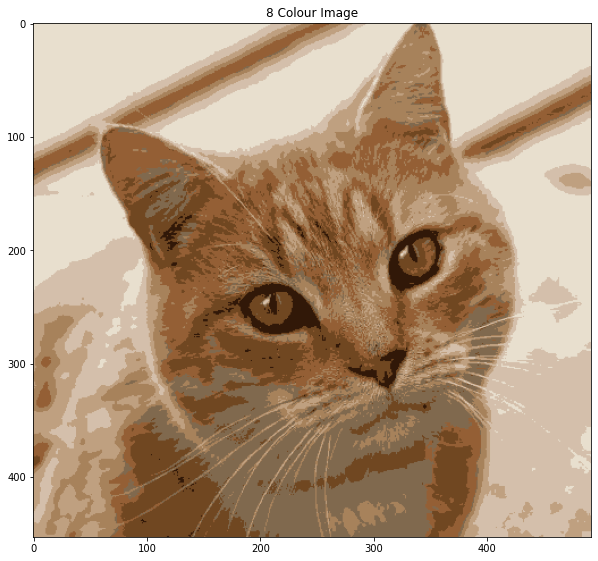

In [14]:
plt.figure(figsize=(10, 10))
plt.imshow(image_compressed);
plt.title('8 Colour Image')

Let try to do another round of color space compression but this time we only manipulate the 1 channel colour space.

In [15]:
url = "https://ia801402.us.archive.org/2/items/ml-fundamentals-data/machine-learning-fundamentals-data/cat.jpg"
image = io.imread(url, as_gray=True)

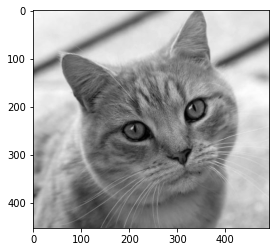

In [16]:
plt.imshow(image, cmap='gray')

In [17]:
image.shape

(453, 492)

Scale the pixel values into a range of 0 to 1.

In [18]:
image_scaled = image / 255.0 
image_scaled = image_scaled.reshape((-1, 1))
image_scaled.shape

(222876, 1)

In [19]:
image_scaled

array([[0.00369497],
       [0.00369497],
       [0.00369497],
       ...,
       [0.00274345],
       [0.00275883],
       [0.00275883]])

Specify **num clusters** to 4.

In [20]:
#TODO: Fill in the number of clusters
num_clusters = 4
model = KMeans(init='k-means++', n_clusters=num_clusters, n_init=10)

In [21]:
model.fit(image_scaled.astype(np.float32))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [22]:
centroids = model.cluster_centers_
labels = model.labels_
inertia = model.inertia_

In [23]:
centroids

array([[0.00261554],
       [0.0033562 ],
       [0.00122132],
       [0.00184043]], dtype=float32)

In [24]:
new_colours = centroids[labels].reshape((-1, 1))

In [25]:
image_compressed = new_colours.reshape(image.shape)

Text(0.5, 1.0, '4 Colour Image')

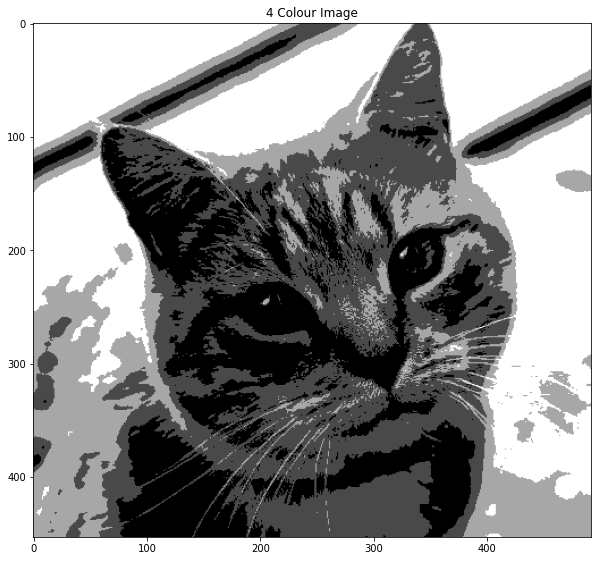

In [26]:
plt.figure(figsize=(10, 10))
plt.imshow(image_compressed, cmap='gray');
plt.title('4 Colour Image')

# Try With Your Own Image

On this section, let us try using your own image to try out the colour reduction
<br>Do remember upload your file into the data folder

In [ ]:
# TODO: Replace the path with your filename.png/jpg/jpeg
path = "data/YOUR FILE NAME"

In [ ]:
self_image = io.imread(path)
plt.imshow(self_image)

In [ ]:
self_image_scale = self_image / 255 #Scale to value between 0 to 1
self_image_scale = self_image_scale.reshape((-1, 3))

Using Elbow method to visualize the best cluster to pick

In [ ]:
k_values = np.arange(2,10)
inertia = []
for k in k_values:
    model = KMeans(init='k-means++', n_clusters=k, n_init=10)
    model.fit(self_image_scale)
    inertia.append(model.inertia_)

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values,inertia,"o-m",linewidth=4, markersize=12)
plt.title("Number of clusters against Inertia",fontsize=20)
plt.xlabel("Number of clusters, K ")
plt.ylabel("Inertia")

From the graph, pick the number of cluster before the inertia stop dropping significantly

In [ ]:
# TODO: Define how many cluster you want, take note that larger cluster, the training time will be longer
cluster = 

# TODO: Build K Means model and fit your data
model = KMeans()
model.fit()

Declaring useful variables

In [ ]:
centroids = model.cluster_centers_
labels = model.labels_
inertia = model.inertia_

In [ ]:
new_colours = centroids[labels].reshape((-1, 3))
image_compressed = new_colours.reshape(self_image.shape)
plt.figure(figsize=(10, 10))
plt.imshow(image_compressed);